# IFQ619 - Assignment 2
## Insight Report


In [1]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.core.display import display, HTML

first_name = "Stephen"
last_name = "Whebell"
student_number = "n10924426"

personal_header = "<h1>"+first_name+" "+last_name+" ("+student_number+")</h1>"
display(HTML(personal_header))

---
## QUESTION 2

#### Question: 
What can the headlines from the Australian national broadcaster (the ABC) tell us about the concerns of the Australian public over time?

#### Data:
[A Million News Headlines](https://www.kaggle.com/therohk/million-headlines)


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

import gensim
from gensim.corpora import Dictionary
from gensim.utils import tokenize
from gensim.utils import simple_preprocess
from gensim.corpora.textcorpus import remove_stopwords
from gensim.summarization import keywords
from gensim.models.ldamodel import LdaModel
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
from gensim.models import TfidfModel

from pattern.en import lemma

### 2.1 Question

The ABC is a publicly funded national broadcaster, which should (subject to some debate) represent current events and national concerns. <br>
Analysing the mention of specific topics and words over time and should enable commentary on the concerns fo the Australian public over time.<br>

<br>
Key stakeholders in the outcomes of this analysis could include the ABC itself, other news reporting agencies seeking to compare trends as well as historians/anthropologists/commentators.

### 2.2 Data

In [3]:
# Import the data
headlines = pd.read_csv('data/abcnews-date-text.csv')

In [4]:
headlines.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [5]:
# Clean/prepare the data for analysis

# Split the date into separate year and month columns, drop the old date column
headlines['publish_date'] = headlines['publish_date'].astype(str)
headlines['year'] = headlines['publish_date'].str[:4]
headlines['month'] = headlines['publish_date'].str[4:6]
headlines.drop('publish_date', axis=1, inplace=True)
headlines = headlines[['year', 'month', 'headline_text']]
headlines.rename(columns = {'headline_text' : 'text'}, inplace=True)

In [6]:
headlines.head()

,year,month,text
0,2003,02,aba decides against community broadcasting lic...
1,2003,02,act fire witnesses must be aware of defamation
2,2003,02,a g calls for infrastructure protection summit
3,2003,02,air nz staff in aust strike for pay rise
4,2003,02,air nz strike to affect australian travellers


We need to process the headlines into a format that useful data can be extracted from. This involves removing words that do not convey meaning (stop words), lemmatising words so that very similar words are not treated differently (e.g. Austrlian and Australians) and grouping together words that covey meaning together (bi/trigrams).

In [7]:
# Pre-process and remove stop words
processed = [remove_stopwords(simple_preprocess(headline, min_len = 3)) for headline in headlines['text']]

In [8]:
# Lemmatise the terms
#try:
#    lemma = [[lemma(wd) for wd in terms] for terms in processed] # This command never works the first time, despite multiple attempts at debugging
#except:
#    lemma = [[lemma(wd) for wd in terms] for terms in processed]

In [9]:
# Create bigrams and trigrams of words that occur together frequently e.g. 'general manager' etc
# General alone has different meaning to "General Manager"

# Build the bigram and trigram models
bigram = gensim.models.Phrases(processed, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[processed], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [10]:
bigrams = [bigram_mod[terms] for terms in processed]

In [11]:
trigrams = [trigram_mod[terms] for terms in bigrams]

In [12]:
headlines['processed'] = trigrams

In [13]:
headlines

,year,month,text,processed
0,2003,02,aba decides against community broadcasting lic...,"[aba, decides, community, broadcasting, licence]"
1,2003,02,act fire witnesses must be aware of defamation,"[act, witnesses, aware, defamation]"
2,2003,02,a g calls for infrastructure protection summit,"[calls, infrastructure, protection, summit]"
3,2003,02,air nz staff in aust strike for pay rise,"[air, staff, aust, strike, pay, rise]"
4,2003,02,air nz strike to affect australian travellers,"[air, strike, affect, australian, travellers]"
...,...,...,...,...
1186013,2019,12,vision of flames approaching corryong in victoria,"[vision, flames, approaching, corryong, victoria]"
1186014,2019,12,wa police and government backflip on drug amne...,"[police, government, backflip, drug, amnesty, ..."
1186015,2019,12,we have fears for their safety: victorian premier,"[fears, safety, victorian, premier]"
1186016,2019,12,when do the 20s start,[start]


In [14]:
# Create a dataframe with the entire text of the headlines per year

yearly_grouped = headlines.groupby(['year'])['processed'].apply(list)

for year in yearly_grouped.index:
    flattened = [y for x in yearly_grouped[year] for y in x]
    yearly_grouped[year] = flattened
    
yearly = pd.DataFrame(index=yearly_grouped.index)
yearly['processed'] = yearly_grouped

yearly

,processed
year,
2003,"[aba, decides, community, broadcasting, licenc..."
2004,"[dead, bomb, ends, aceh, new, years, concert, ..."
2005,"[killed, kashmir, new, year, party, called, af..."
2006,"[adelaide, end, losing_streak, adelaide, notch..."
2007,"[arrested, adelaide, new, years, govt, papers,..."
2008,"[deadliest, year, troops, iraq, french, cars_t..."
2009,"[deadliest, year, forces, afghanistan, dubbed,..."
2010,"[degas, stolen, museum, die, bangladesh, bus, ..."
2011,"[killed, nigerian, market, blast, drown, egypt..."


### 2.3 Analysis


The number of headlines published each year changes, we should quantify this so we are able to use it in further analysis.

In [15]:
# Count how many headlines were published in each year

headperyearlist = []
for year in yearly.index:
    headperyearlist.append(len(headlines[(headlines['year'] == year)]))
yearly['total_headlines'] = headperyearlist

We can count the raw word frquency per year as a crude guide to change in public concern/issues over time.

In [16]:
# Count the most frequent words for each year
top_five_list = []

for year in yearly['processed']:
    word_counts = {}
    
    for word in year:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
            
    sorted_counts = {k: v for k, v in sorted(word_counts.items(), key=lambda item: item[1],reverse=True)}
    top_five = list(sorted_counts.keys())[0:5]
    top_five_list.append(top_five)

yearly['top_five_words'] = top_five_list

In [17]:
# Create vocab and BoW for the processed headlines to enable model fitting

vocab = Dictionary(headlines['processed'])

corpus = [vocab.doc2bow(terms) for terms in headlines['processed']] # Corpus of each individual headline

corpus_yearly = [vocab.doc2bow(terms) for terms in yearly['processed']] # Corpus of words used in each year

TF-IDF can be used to try and find the words which are most representative of each year when compared to the headlines as a whole.

In [18]:
# Use TF-IDF to determine the top 5 words for each year

tfidf_model = TfidfModel(corpus_yearly)

def get_tfidf(idx):
    term_values = [(vocab[el[0]],el[1]) for el in tfidf_model[corpus_yearly[idx]] if el[1]>0]
    srt =  sorted(term_values, key=lambda x: x[1],reverse=True)
    return list(map(lambda x: x[0],srt[:5]))

tfidf_words = []

for i in range(len(yearly)):
    tfidf_words.append(get_tfidf(i))

yearly['tfidf_words'] = tfidf_words

yearly

,processed,total_headlines,top_five_words,tfidf_words
year,,,,
2003,"[aba, decides, community, broadcasting, licenc...",63997,"[police, govt, new, man, council]","[sars, medical_indemnity, amrozi, sars_cases, ..."
2004,"[dead, bomb, ends, aceh, new, years, concert, ...",72674,"[police, new, govt, man, council]","[najaf, fallujah, aristide, arafat, zarqawi]"
2005,"[killed, kashmir, new, year, party, called, af...",73124,"[police, govt, new, council, man]","[solon, vsu, wmc, corby, southcorp]"
2006,"[adelaide, end, losing_streak, adelaide, notch...",66901,"[police, govt, new, man, council]","[kovco, cole_inquiry, alkatiri, closer_abcnews..."
2007,"[arrested, adelaide, new, years, govt, papers,...",77174,"[police, govt, man, new, water]","[haneef, horse_flu, nrl_interviews, auspine, w..."
2008,"[deadliest, year, troops, iraq, french, cars_t...",79991,"[police, govt, man, new, qld]","[wyd, haneef, fuelwatch, obama, obama_mccain]"
2009,"[deadliest, year, forces, afghanistan, dubbed,...",76444,"[police, man, new, interview, govt]","[swine_flu, swine_flu_cases, ets, ozcar, stimu..."
2010,"[degas, stolen, museum, die, bangladesh, bus, ...",74931,"[police, interview, man, new, court]","[gas_hub, geoff_hutchison_talks, delhi_games, ..."
2011,"[killed, nigerian, market, blast, drown, egypt...",77778,"[police, man, new, interview, flood]","[abc_entertainment, abc_sport, abc_weather, ne..."


To gain a better understanding of how public concern changes over time we can attempt to derive topics from the headlines, classify each headline into its most likely topic and then assess to representation of each topic over time. <br>

LDA provides a good way to do this.<br>

To begin, we need to determine a sensible number of topics used to classify headlines. This is done by finding the number of topics which provides the best coherence score, but also a degree of personal choice and common sense.

In [19]:
# Calculate the U Mass coherence score for a range of different topic numbers to get an idea of the best number of topics
# Running this cell takes some time

coherence = []

for i in range(1,15,1):
    lda_model = LdaMulticore(corpus=corpus, id2word=vocab, num_topics=i, workers=12)
       
    cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
    coherence.append(cm.get_coherence())

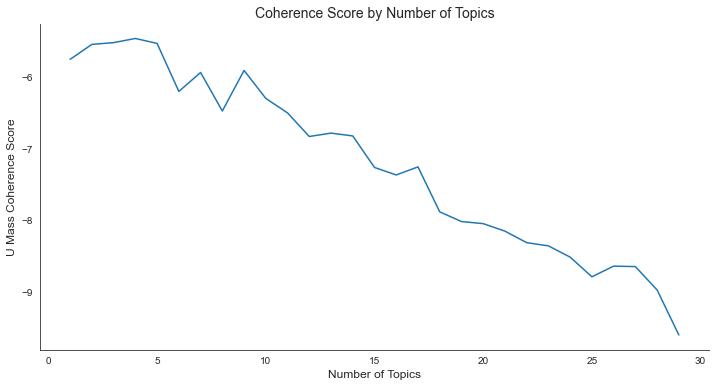

In [20]:
sns.set_style('white') # Seaborn for style

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(1,15,1), coherence)
ax.set_title('Coherence Score by Number of Topics', fontsize=14)
ax.set_ylabel('U Mass Coherence Score', fontsize=12)
ax.set_xlabel('Number of Topics', fontsize=12)
sns.despine()

There is decline in coherence after 4 topics - however, this is unlikely to represent the diversity of news headlines well. For this reason, we are going to choose six topics to model. This provides a good trade off between coherence score and the ability to represent the headlines accurately. 

In [21]:
lda_model = LdaMulticore(corpus=corpus, id2word=vocab, num_topics=10, workers=12)

In [23]:
# view the topics in the model
for topic in lda_model.show_topics(num_topics=10,num_words=5):
    print("Topic "+str(topic[0])+"\n"+topic[1]+"\n")

Topic 0
0.010*"takes" + 0.009*"flood" + 0.008*"nsw" + 0.007*"young" + 0.006*"lead"

Topic 1
0.017*"water" + 0.011*"says" + 0.010*"national" + 0.009*"govt" + 0.009*"new"

Topic 2
0.017*"sydney" + 0.012*"rural" + 0.010*"says" + 0.009*"ban" + 0.009*"residents"

Topic 3
0.015*"china" + 0.008*"time" + 0.008*"australian" + 0.008*"new" + 0.008*"council"

Topic 4
0.016*"new" + 0.012*"australia" + 0.011*"open" + 0.011*"win" + 0.009*"day"

Topic 5
0.021*"crash" + 0.012*"house" + 0.010*"car" + 0.010*"road" + 0.008*"dies"

Topic 6
0.026*"court" + 0.020*"man" + 0.013*"accused" + 0.012*"missing" + 0.010*"woman"

Topic 7
0.020*"australia" + 0.011*"says" + 0.011*"budget" + 0.011*"south" + 0.009*"talks"

Topic 8
0.054*"police" + 0.028*"man" + 0.026*"interview" + 0.019*"charged" + 0.012*"murder"

Topic 9
0.011*"hospital" + 0.008*"jobs" + 0.008*"union" + 0.008*"power" + 0.008*"pay"



We can predict the most likely topic for each headline and append it to the dataframe of all headlines.

In [24]:
# This cell takes come time to run

topics = []

for idx in range(len(headlines['processed'])):
    try:
        topics.append(lda_model.get_document_topics(corpus[idx], minimum_probability=0.3)[0][0])
    except:
        topics.append(np.nan)
        
headlines['topic'] = topics

Some headlines were not able to have a topic predicted with a minimum probability of 30%.

In [25]:
nanpercent = np.round(headlines['topic'].isnull().sum() / len(headlines['topic']) * 100, decimals = 2)

print(str(nanpercent) + "% of headlines missing topic - dropping from dataframe.")

headlines.dropna(how='any', axis=0, inplace=True)

5.04% of headlines missing topic - dropping from dataframe.


We can attempt to ascribe some interpretable meaning to the topics by using the words listed above and also by reviewing a sample of the headlines from each topic.

In [37]:
print("Random sample of 5 headlines from each topic: \n")
for i in range(10):
    sample = headlines.text[headlines['topic'] == i].sample(n=5).values
    print("Topic " + str(i) + ":")
    print(sample)

Random sample of 5 headlines from each topic: 

Topic 0:
['funding feud putting homeless at risk'
 'agforce ready to work with new minister' 'korean war 58th anniversary'
 'govt accused of abandoning young people'
 'future of endangered ngandi language rests with youth']
Topic 1:
['environment projects receive funding boost'
 'auditors to crack down on hunter bars and clubs' 'win cuts weekend news'
 'drought mining changes lower broken hill numbers'
 'brent livermore tells abc news hobart reporter']
Topic 2:
['bombers suspend hurley' 'work delayed on fire affected grampians tracks'
 'dairy industry needs export fix' 'rural sach murray cod camera dpi'
 'devastating winds in melbourne']
Topic 3:
['new iron ore mine promises 190 jobs'
 'greek pm vows austerity rollback; rejects international bailo'
 'port fees on the rise in gippsland'
 'vic govt urged to aid don krc expansion'
 'all ords hit yearly low as wall st slumps']
Topic 4:
['will australian muslims lose their culture over'
 'cane

In [31]:
headlines = pd.concat([headlines, pd.get_dummies(headlines['topic'].astype('int'), prefix='topic')], axis=1)

In [38]:
topics = ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9']

In [33]:
summed_topics = headlines.groupby('year')[topics].apply(sum)

yearly = pd.concat([yearly, summed_topics], axis=1)

In [34]:
yearly

,processed,total_headlines,top_five_words,tfidf_words,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
year,,,,,,,,,,,,,,
2003,"[aba, decides, community, broadcasting, licenc...",63997,"[police, govt, new, man, council]","[sars, medical_indemnity, amrozi, sars_cases, ...",6667,8529,6536,7196,8424,5229,6147,5221,4296,4668
2004,"[dead, bomb, ends, aceh, new, years, concert, ...",72674,"[police, new, govt, man, council]","[najaf, fallujah, aristide, arafat, zarqawi]",7542,9791,7287,8324,8896,5805,6667,5797,5139,5544
2005,"[killed, kashmir, new, year, party, called, af...",73124,"[police, govt, new, council, man]","[solon, vsu, wmc, corby, southcorp]",7360,10203,7694,7712,8433,5760,6816,5784,5506,5846
2006,"[adelaide, end, losing_streak, adelaide, notch...",66901,"[police, govt, new, man, council]","[kovco, cole_inquiry, alkatiri, closer_abcnews...",7153,9801,7220,6859,7615,5221,6121,5312,4709,4914
2007,"[arrested, adelaide, new, years, govt, papers,...",77174,"[police, govt, man, new, water]","[haneef, horse_flu, nrl_interviews, auspine, w...",8406,11657,7971,7363,7527,5842,7826,6070,6162,5782
2008,"[deadliest, year, troops, iraq, french, cars_t...",79991,"[police, govt, man, new, qld]","[wyd, haneef, fuelwatch, obama, obama_mccain]",8163,11100,7677,8122,8671,6466,8243,6037,6623,5996
2009,"[deadliest, year, forces, afghanistan, dubbed,...",76444,"[police, man, new, interview, govt]","[swine_flu, swine_flu_cases, ets, ozcar, stimu...",7471,9337,7924,6815,8849,6189,7773,5640,7555,5590
2010,"[degas, stolen, museum, die, bangladesh, bus, ...",74931,"[police, interview, man, new, court]","[gas_hub, geoff_hutchison_talks, delhi_games, ...",7993,8809,7479,6665,9105,5874,7393,4917,7896,5128
2011,"[killed, nigerian, market, blast, drown, egypt...",77778,"[police, man, new, interview, flood]","[abc_entertainment, abc_sport, abc_weather, ne...",8751,8517,8537,6821,9314,5868,6983,5487,7028,5747


In [61]:
import pyLDAvis
import pyLDAvis.gensim

C:\Users\swheb\anaconda3\envs\ifq619\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, vocab)
vis

In [62]:
del pyLDAvis

C:\Users\swheb\anaconda3\envs\ifq619\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'pyLDAvis' is not defined

### 2.4 Visualisation



In [40]:
yearly[topics].sum()

topic_0    123059
topic_1    150846
topic_2    127720
topic_3    113166
topic_4    136116
topic_5     91286
topic_6    109990
topic_7     93024
topic_8     96087
topic_9     84956
dtype: int64

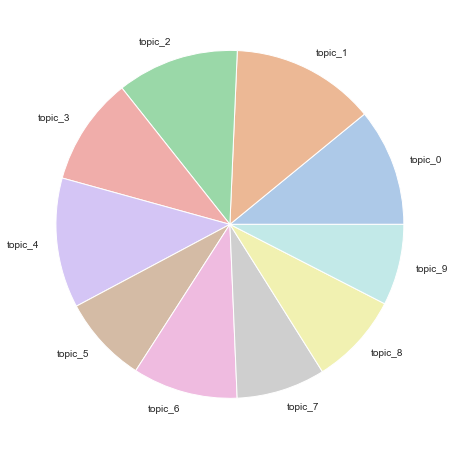

In [44]:
sns.set_style('white') # Seaborn for style
sns.set_palette('pastel', desat=0.7)

fig,ax = plt.subplots(figsize=(8,8))

ax = plt.pie(yearly[topics].sum(), labels=topics)

We can plot the topics over time, but given the significant decrease in total headlines published over time we should index against this.

In [35]:
topicsindex = yearly[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4',
                      'topic_5','topic_6', 'topic_7', 'topic_8', 'topic_9']].copy()

for i in topicsindex.columns:
    topicsindex[i] = topicsindex[i].div(yearly['total_headlines'])

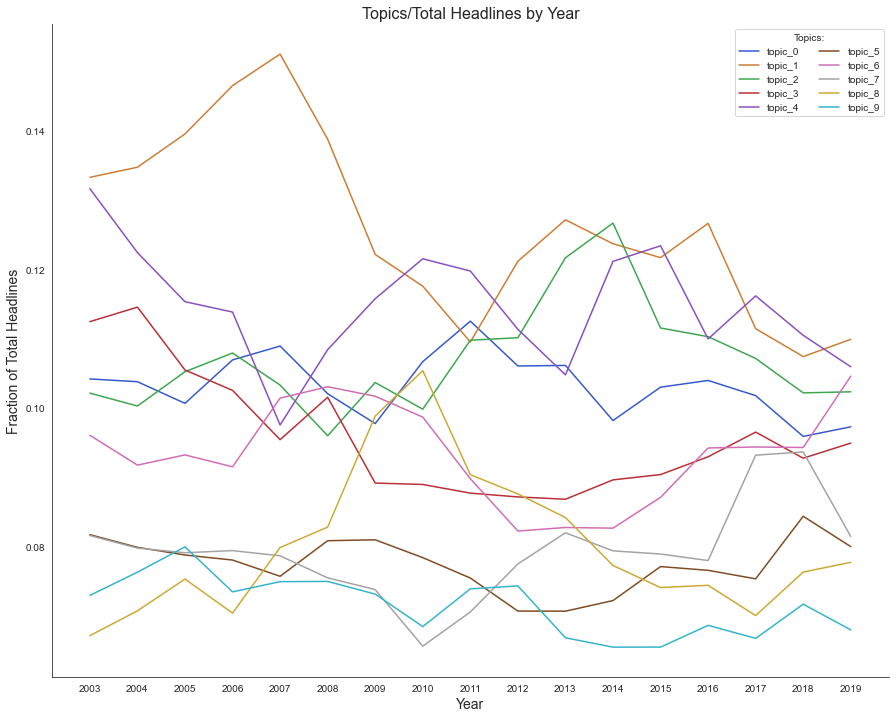

In [36]:
sns.set_style('white') # Seaborn for style
sns.set_palette('bright', desat=0.6)

fig, ax = plt.subplots(figsize=(15,12))
ax.plot(topicsindex)
ax.set_title('Topics/Total Headlines by Year', fontsize=16)
ax.set_ylabel('Fraction of Total Headlines', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.legend(topicsindex.columns.tolist(), title='Topics:', ncol=2)
sns.despine()
plt.show()

### 2.5 Insight

**General Insights**
- There has been a significant decline in the total number of headlines published since 2013. The peak was just over 90,000 headlines in 2013, falling steeply since with just under half this number of headlines in 2019
- This could coincide with progressive funding cuts since 2014 (https://www.theguardian.com/media/2020/may/04/abc-loses-793m-funding-since-2014-when-coalition-made-its-first-cuts-report)
- This substantial decline necessitated representing topics as an index of total headlines per year to enable meaningful analysis of changes over time

**Topics that declined over time**
- *War and terrorism:* 
    - Steady decline in mention of words relating to war and terrorism has occurred since 2003, although there has been a slight upward trend in recent years.

**Topics that were unchanged over time**
- *Crime and justice:* 
    - Consistently high level of reporting, which has been maintained over the time period examined.
- *Politics:*
    - Consistently high level of reporting, which has been maintained over the time period examined.
- *Good news:*
    - Unfortuantely good news formed the minority of mentions in headlines, which was consistent over time.

**Topics that increased over time**
- *Countries and international relations*:
    - Use of the word 'Australia' was the primary driver in the overall increase in headlines observed in this topic. This could represent increased reporting on domestic matters or could even be interpreted as increasing Australian nationalism
    - Interestingly, when plotted seperately, mention of Iraq was high in 2003 declining thereafter. This coincided with the 2003 invasion of Iraq.
- *Disasters*:
    - Although forming an overall small proportion of headlines, mention of disasters has more than doubled since 2003.
    - Fluctuance can be observed over time with peaks tracking world events in 2005 (follow on from the boxing day tsunami, and subsequently hurricane Katrina in the USA), 2011 (Queensland Floods), 2019 (onset of the Australian bushfires).
- *Education, science and art*:
    - Steady rise since 2011, it is difficult to relate this to specific concerns. However, possibilities include significant changes to university fees and funding over this time period or perhaps an increase in the rate of scientific discovery.
- *Economy and Business*:
    - Steady, but consistent increase over time. This could reflect increasing economic volatility over time, concern for rising housing and rental prices or increased coverage of businesses.
- *Sport:*
    - Slight increase over time.
- *Specific topics:*
    - Combined slight increase over time, but the fluctuation of the individual word mentions within are more interesting.
    - Concern regarding the climate significantly increased, reaching it's highest number of mentions in 2019
    - Concern regarding asylum seekers peaked between 2010 and 2013 and has declined since
    - Mining followed a similar pattern to asylum seekers
    - Indigenous australians have remains a consistent topic of concern, with two peaks (2007 and 2016)

**Limitations of analysis**
- Topics of interest and the words to represent them were picked prior to analysis of the dataset, rather than based on initial analysis of the headlines
    - This could result in significant topics being missed, the topics being chosen not representative of public concern or the words chosen not being truly representetive of the topics themselves
- Indexing of words / topics against total headlines published in a year assumes that each word found correlates to a single headline. This is unlikely to be the case as with the word frequency technique used there is likely to be overlap within and even between topics.

**Future directions**
- Frequency of headlines relating to a specific topic does not convey sentiment toward the particular topic, examining sentiment regarding particular topics over time could provide useful insight
- Generating topics from the data itself prior to examining their trends over time would potentially provide a more accurate representation of 


**Conclusion**<br>
Headlines from the ABC were able to track changes in multiple topics representing the changing concerns of the Australian public over time.